# CRANTpy Tutorial: Advanced Topics
This tutorial will guide you through the process of using advanced features of the CRANTpy package for analyzing CRANTb data.

In [2]:
# Import CRANTpy and other necessary libraries
import crantpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import navis
import cloudvolume as cv

# Set up logging to see progress
cp.set_logging_level("INFO")

print("CRANTpy loaded successfully!")
print(f"Default dataset: {cp.CRANT_DEFAULT_DATASET}")

CRANTpy loaded successfully!
Default dataset: latest


## 1. Authentication Setup

Before we can access the data, we need to authenticate with the CAVE service. This is typically a one-time setup.

In [3]:
# Generate and save authentication token (uncomment if first time)
# cp.generate_cave_token(save=True)

# Test connection
try:
    client = cp.get_cave_client()
    print(f"Successfully connected to datastack: {client.datastack_name}")
    print(f"Server: {client.server_address}")
except Exception as e:
    print(f"Connection failed: {e}")
    print("Please run: cp.generate_cave_token(save=True)")

Successfully connected to datastack: kronauer_ant
Server: https://proofreading.zetta.ai


## Soma Detection

In [4]:
neuron_id = 576460752664524086
soma = cp.detect_soma(neuron_id)
soma

Skeletonizing:   0%|          | 0/344048 [00:00<?, ?it/s]

array([33163, 22353,   472])

In [5]:
def plot_em_image(x, y, z, size=500, mip=0):
    if mip != 0:
        raise ValueError("Only mip level 0 is supported for plotting images.")
    em_url = "precomputed://gs://dkronauer-ant-001-alignment-final/aligned"
    vol = cv.CloudVolume(em_url, mip=mip, use_https=True)  # use_https is often needed for GCP buckets
    img = vol[x-size//2:x+size//2, y-size//2:y+size//2, z:z+1]
    img = img.squeeze()
    return img 

Decompressing: 100%|██████████| 25/25 [00:00<00:00, 1321.34it/s]


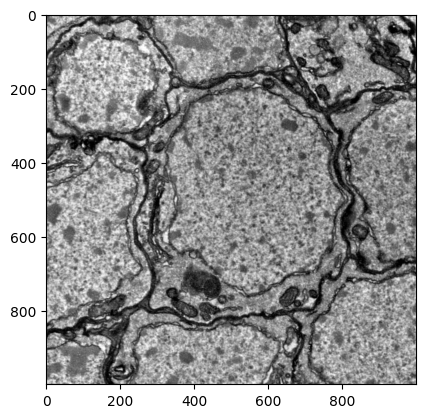

In [6]:
plt.imshow(plot_em_image(soma[0], soma[1], soma[2], size=1000, mip=0), cmap='gray')
plt.show()